# 训练日志和评估指标可视化

同济子豪兄 2023-4-27

## 训练得到的模型权重文件

最优模型：`Project_Name/Name/weights/best.pt`

最终模型：`Project_Name/Name/weights/last.pt`

## 数据集标注统计

目标检测框的中心点位置分布、宽高分布：`labels.jpg`

目标检测框的中心点X、中心点Y、宽、高相关分布：`labels_correlogram.jpg`

## 训练集：某一个batch的标注可视化

`train_batch0.jpg`

`train_batch1.jpg`

`train_batch2.jpg`

## 测试集：某一个batch的标注、预测结果可视化

标注：`val_batch0_labels.jpg`

预测结果：`val_batch0_pred.jpg`

标注：`val_batch1_labels.jpg`

预测结果：`val_batch1_pred.jpg`

## 目标检测评估指标

不同置信度的Precision：`BoxP_curve.png`

不同置信度的Recall：`BoxR_curve.png`

不同置信度的PR曲线：`BoxPR_curve.png`

不同置信度的F1：`BoxF1_curve.png`

目标检测框混淆矩阵：`confusion_matrix.png`

## 关键点检测评估指标

不同置信度的Precision：`PoseP_curve.png`

不同置信度的Recall：`PoseR_curve.png`

不同置信度的PR曲线：`PosePR_curve.png`

不同置信度的F1：`PoseF1_curve.png`

## 训练日志

训练过程中的损失函数、测试集评估指标：`results.csv`、`results.png`

## 损失函数、测试集评估指标可视化

### 导入工具包

In [7]:
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 创建 图表 文件夹，用于存放图表
if not os.path.exists('图表'):
    os.mkdir('图表')
    print('创建空文件夹 图表')

创建空文件夹 图表


### 设置matplotlib中文字体（如果中文显示为方框，重启kernel重新运行即可）

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果报错 Unable to establish SSL connection.，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf --no-check-certificate
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2023-04-27 11:13:05--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  13.7MB/s    用时 0.7s    

2023-04-27 11:13:06 (13.7 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



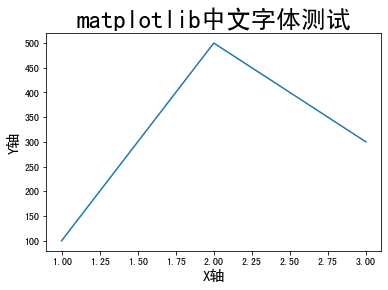

In [5]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

### 载入训练日志文件

In [24]:
df = pd.read_csv('Triangle_215/n_pretrain/results.csv')
df.columns = [each.strip() for each in df.columns]

In [25]:
df.head()

,epoch,train/box_loss,train/pose_loss,train/kobj_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/mAP50(P),metrics/mAP50-95(P),val/box_loss,val/pose_loss,val/kobj_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,2.33690,5.2718,0.69311,3.37180,2.4481,0.16934,0.24390,0.11593,0.06231,...,0.04254,0.00526,1.93750,4.9523,0.64460,3.14880,2.1562,0.091000,0.001000,0.001000
1,1,1.21370,5.0412,0.69171,1.45150,1.4694,0.85484,0.85366,0.91207,0.70937,...,0.04957,0.00592,0.76907,4.8625,0.63774,0.73728,1.1322,0.081058,0.002058,0.002058
2,2,0.86661,4.7148,0.69019,0.83162,1.2066,0.94511,0.83993,0.94295,0.78416,...,0.10077,0.01072,0.66899,4.8102,0.61268,0.69843,1.0872,0.071073,0.003073,0.003073
3,3,0.77936,4.3592,0.67738,0.70257,1.1358,0.91723,0.87805,0.95713,0.81301,...,0.19012,0.02421,0.63649,4.4893,0.56842,0.56161,1.0796,0.061045,0.004045,0.004045
4,4,0.76675,3.7277,0.66435,0.62813,1.1184,0.92567,0.92683,0.95311,0.80225,...,0.63429,0.14494,0.60545,3.8090,0.54675,0.65349,1.0477,0.050972,0.004972,0.004972


In [26]:
df.columns

Index(['epoch', 'train/box_loss', 'train/pose_loss', 'train/kobj_loss',
       'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)',
       'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
       'metrics/precision(P)', 'metrics/recall(P)', 'metrics/mAP50(P)',
       'metrics/mAP50-95(P)', 'val/box_loss', 'val/pose_loss', 'val/kobj_loss',
       'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

### 可视化辅助函数

In [27]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### 训练集损失函数

In [38]:
metrics = ['train/box_loss', 'train/pose_loss', 'train/kobj_loss', 'train/cls_loss', 'train/dfl_loss']

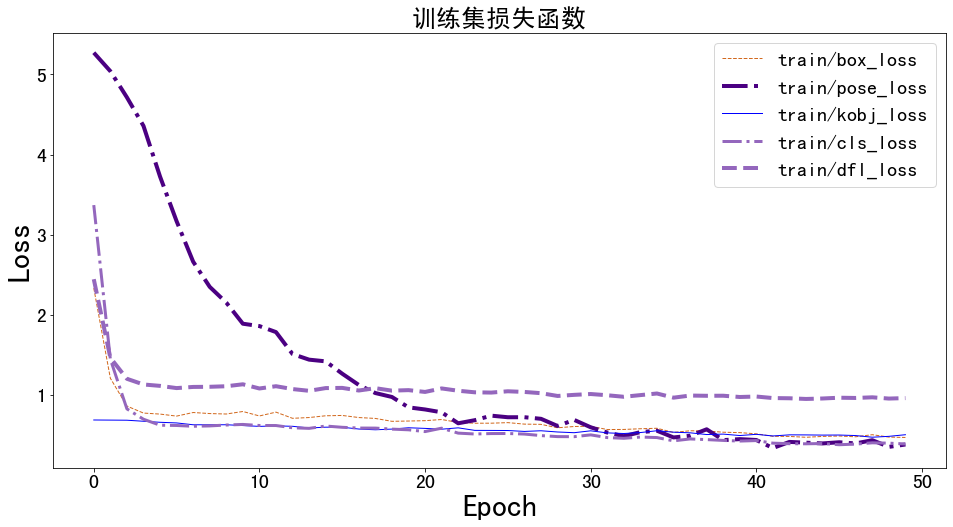

In [39]:
plt.figure(figsize=(16, 8))

x = df['epoch']
for y in metrics:
    plt.plot(x, df[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('Loss', fontsize=30)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

### 测试集损失函数

In [40]:
metrics = ['val/box_loss', 'val/pose_loss', 'val/kobj_loss', 'val/cls_loss', 'val/dfl_loss']

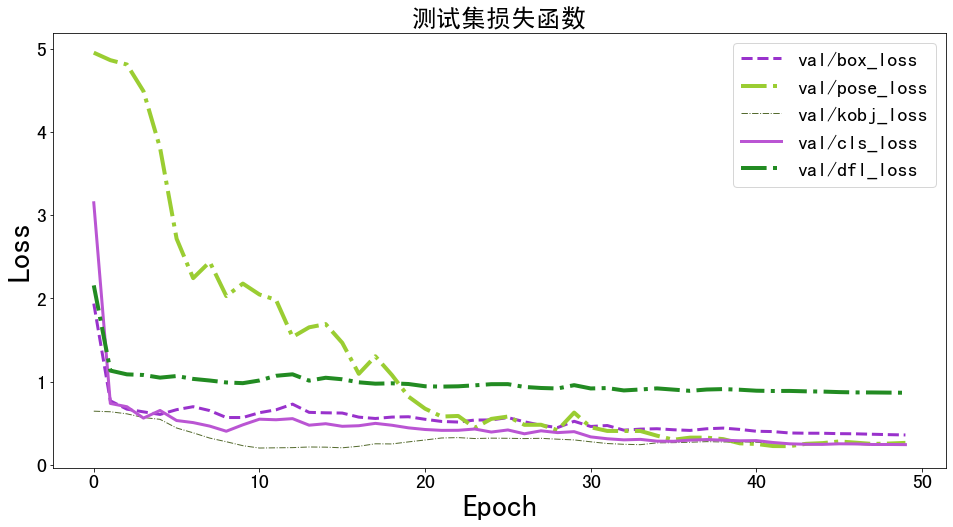

In [41]:
plt.figure(figsize=(16, 8))

x = df['epoch']
for y in metrics:
    plt.plot(x, df[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('Loss', fontsize=30)
plt.title('测试集损失函数', fontsize=25)
plt.savefig('图表/测试集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

### 测试集评估指标-目标检测

In [42]:
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

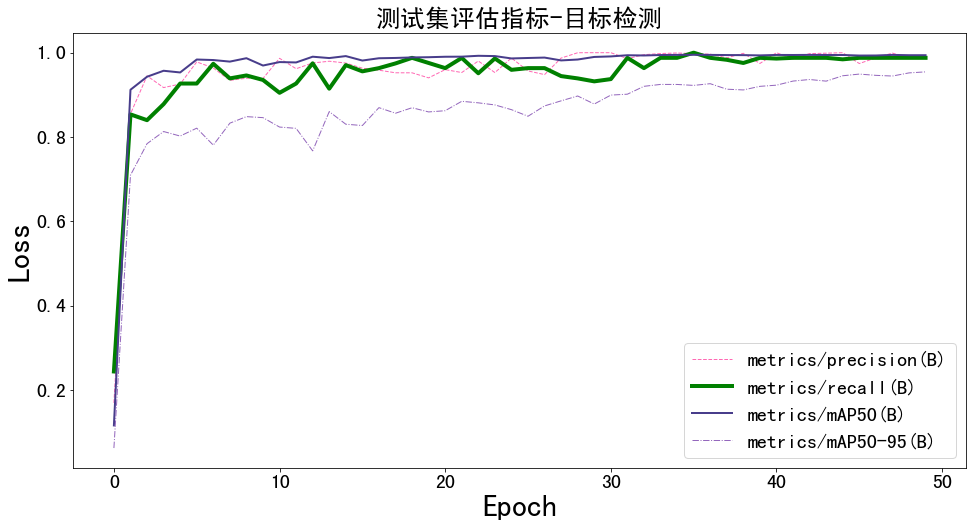

In [44]:
plt.figure(figsize=(16, 8))

x = df['epoch']
for y in metrics:
    plt.plot(x, df[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('Loss', fontsize=30)
plt.title('测试集评估指标-目标检测', fontsize=25)
plt.savefig('图表/测试集评估指标-目标检测.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

### 测试集评估指标-关键点检测

In [45]:
metrics = ['metrics/precision(P)', 'metrics/recall(P)', 'metrics/mAP50(P)', 'metrics/mAP50-95(P)']

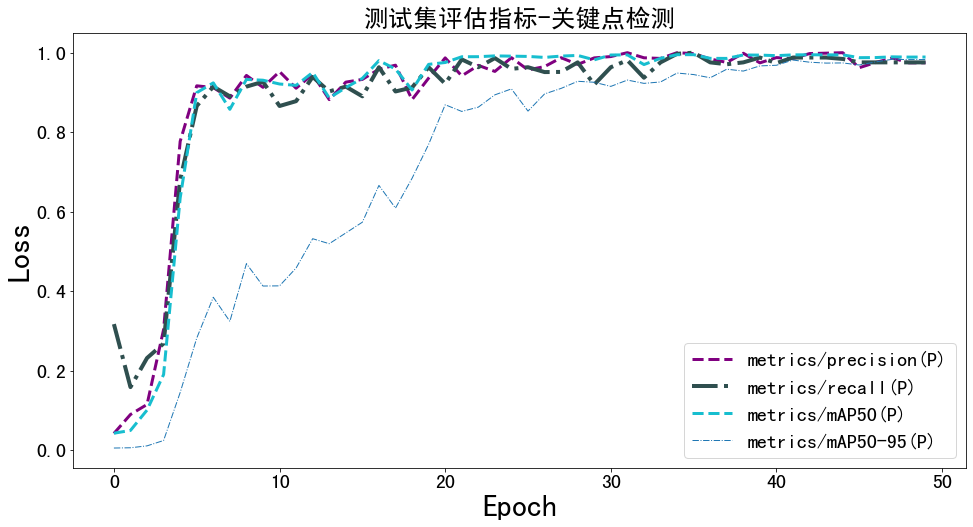

In [46]:
plt.figure(figsize=(16, 8))

x = df['epoch']
for y in metrics:
    plt.plot(x, df[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('Loss', fontsize=30)
plt.title('测试集评估指标-关键点检测', fontsize=25)
plt.savefig('图表/测试集评估指标-关键点检测.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()